In [1]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in C:\Users\Berne/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


In [2]:
# Download an example image
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import time


input_image_py = Image.open(filename)
m, s = np.mean(input_image_py, axis=(0, 1)), np.std(input_image_py, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image_py)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    startTime = time.time()
    output_py = model(input_batch)
    stopTime = time.time()
    time_py = stopTime - startTime

print(time_py * 1000) # convert from sec to milisecs


942.983865737915


In [4]:
import cv2

input_image_py = np.array(input_image_py)

output_img_py = torch.round(output_py[0][0]).detach().numpy()
output_image_py = np.zeros((255,255,3))
for row_nr in range(0, 255):
    for col_nr in range(0, 255):
        output_image_py[row_nr][col_nr] = (input_image_py[row_nr][col_nr] * output_img_py[row_nr][col_nr])


In [5]:
# for row in input_image_py:
#     for pix in row:
#         for val in pix:
#             print(f"{val},", end="")

In [6]:
input_image_cpp = input_image_py

# import numpy as np
# input_array_cpp = []
# with open("../bin/input_img.txt", "r")  as my_file:
#     data_line = my_file.readline()
#     for val in data_line.split(","):
#         if val == "":
#             continue
#         input_array_cpp.append(int(np.round(float(val))))

# input_image_cpp = np.array(input_array_cpp).reshape((256, 256, 3))

In [7]:
import numpy as np

output_array_cpp = []
with open("../bin/unet.output.txt", "r")  as my_file:
    time_line = my_file.readline()
    time_cpp = float(time_line)
    print(time_cpp)
    line = my_file.readline()
    for val in line.split(","):
        if val == "":
            continue
        output_array_cpp.append(int(np.round(float(val))))

mask_cpp = np.array(output_array_cpp).reshape((256, 256))


27121276115.0


In [8]:
input_image_cpp = np.array(input_image_cpp)


output_image_cpp = np.zeros((255,255,3))
for row_nr in range(0, 255):
    for col_nr in range(0, 255):
        output_image_cpp[row_nr][col_nr] = (input_image_cpp[row_nr][col_nr] * mask_cpp[row_nr][col_nr])

In [9]:
# import torch
# import onnxruntime as ort

# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#         in_channels=3, out_channels=1, init_features=32, pretrained=True)

# # print(torch.__config__.show())
# # print(model)
# model.eval()
# input_image_pyonnxx = torch.randn(1, 3, 256, 256)
# input_image_pyonnxx = input_image_py
# input_tensor = preprocess(input_image_py).reshape(1, 3, 256, 256)


# onnx_program = torch.onnx.export(model, input_tensor, "unet.onnx")
# onnx_program.save("unet.onnx")


# ort_sess = ort.InferenceSession("unet.onnx")

# mask_pyonnxx = np.round(np.array(ort_sess.run(None, {'input.1': input_tensor.numpy()})).reshape((256, 256)))
# print(mask_pyonnxx)

In [10]:
# input_image_pyonnxx = np.array(input_image_pyonnxx).reshape((256, 256, 3))

# output_image_pyonnxx = np.zeros((255,255,3))
# for row_nr in range(0, 255):
#     for col_nr in range(0, 255):
#         output_image_pyonnxx[row_nr][col_nr] = (input_image_pyonnxx[row_nr][col_nr] * mask_pyonnxx[row_nr][col_nr])

python finished in 0.942983865737915 seconds
cpp finished in 2.7121276115 seconds
python onnx finished in None seconds


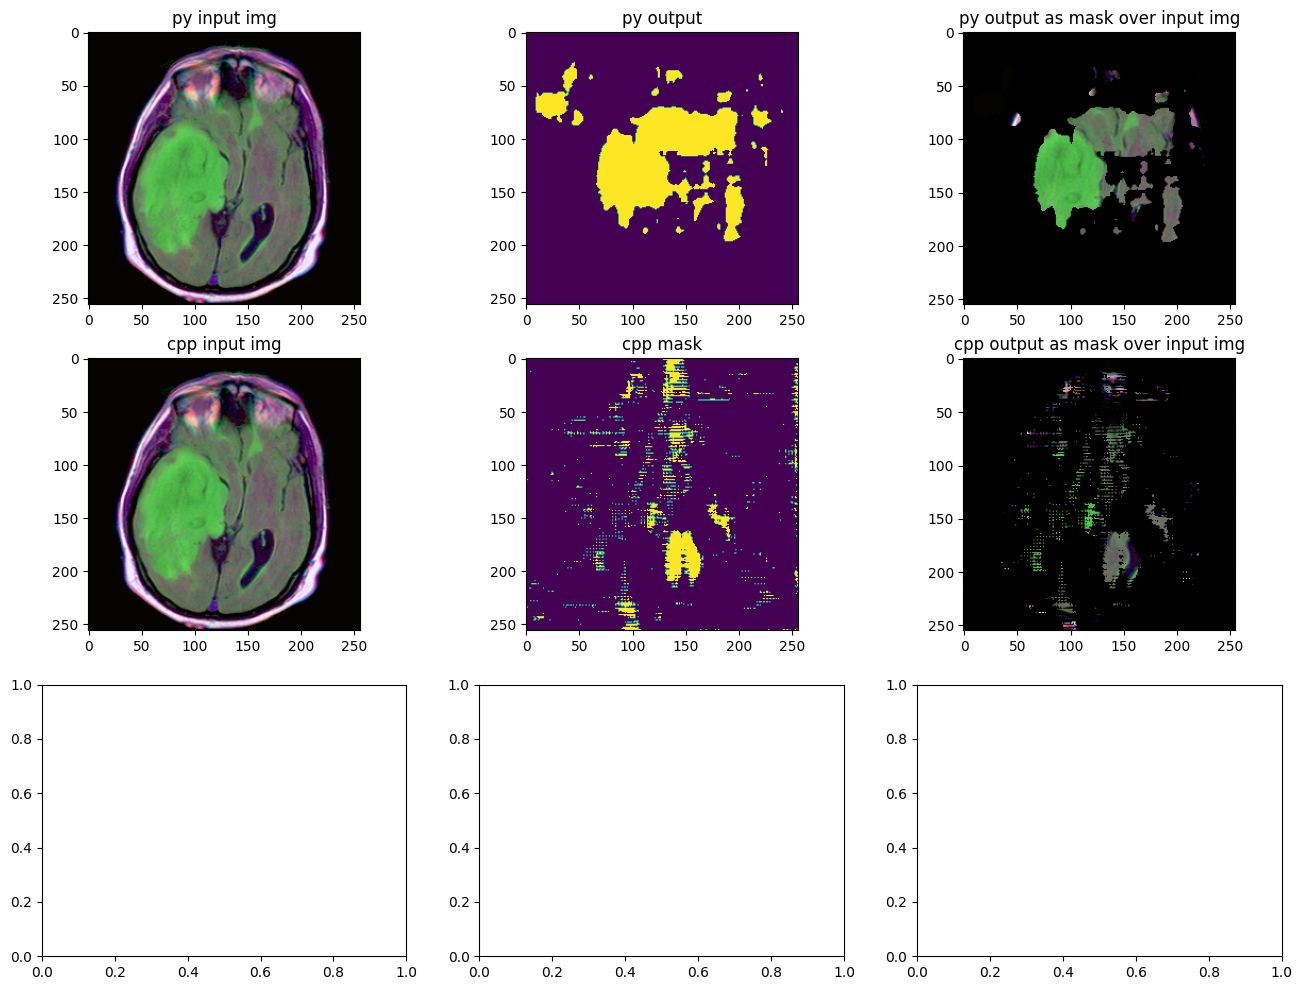

In [13]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, 3)
fig.set_figwidth(16)
fig.set_figheight(12)

ax[0][0].imshow(input_image_py.astype('uint8'))
ax[0][0].set_title("py input img")
ax[0][1].imshow(output_img_py.astype('uint8'))
ax[0][1].set_title("py output")
ax[0][2].imshow(output_image_py.astype('uint8'))
ax[0][2].set_title("py output as mask over input img")

ax[1][0].imshow(input_image_cpp.astype('uint8'))
ax[1][0].set_title("cpp input img")
ax[1][1].imshow(mask_cpp.astype('uint8'))
ax[1][1].set_title("cpp mask")
ax[1][2].imshow(output_image_cpp.astype('uint8'))
ax[1][2].set_title("cpp output as mask over input img")

# ax[2][0].imshow(input_image_pyonnxx.astype('uint8'))
# ax[2][0].set_title("py onnx input image")
# ax[2][1].imshow(mask_pyonnxx.astype('uint8'))
# ax[2][1].set_title("py onnx mask")
# ax[2][2].imshow(output_image_pyonnxx.astype('uint8'))
# ax[2][2].set_title("py onnx output as mask over input img")

print(f"python finished in {time_py} seconds")
print(f"cpp finished in {time_cpp / 10e9} seconds")
print(f"python onnx finished in {None} seconds")